# Example 4: Projected galaxy clustering $w_{\rm p}$

In this example, we'll show how to calculate $w_{\rm p},$ the projected clustering signal of a mock catalog.  

In [2]:
from halotools.empirical_models import PrebuiltHodModelFactory
model = PrebuiltHodModelFactory('tinker13', threshold = 10.25)

from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', redshift=0, halo_finder='rockstar')

model.populate_mock(halocat)


Now we will extract the *x, y, z* positions of various subsamples of our galaxies 

In [3]:
x = model.mock.galaxy_table['x']
y = model.mock.galaxy_table['y']
z = model.mock.galaxy_table['z']


In [4]:
from halotools.mock_observables import return_xyz_formatted_array

all_positions = return_xyz_formatted_array(x, y, z)

red_mask = (model.mock.galaxy_table['sfr_designation'] == 'quiescent')
blue_mask = (model.mock.galaxy_table['sfr_designation'] == 'active')

red_positions = return_xyz_formatted_array(x, y, z, mask = red_mask)
blue_positions = return_xyz_formatted_array(x, y, z, mask = blue_mask)


In [6]:
from halotools.mock_observables import wp

In [7]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)

wp_all = wp(all_positions, rp_bins, pi_max, period=model.mock.Lbox, num_threads='max')
wp_red = wp(red_positions, rp_bins, pi_max, period=model.mock.Lbox, num_threads='max')
wp_blue = wp(blue_positions, rp_bins, pi_max, period=model.mock.Lbox, num_threads='max')


In [6]:
%matplotlib inline

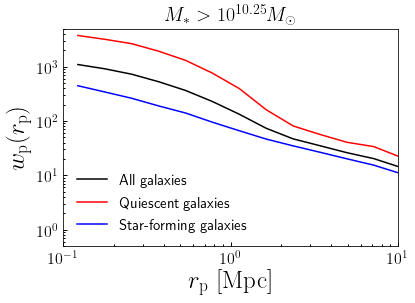

In [9]:
rp_bin_centers = (rp_bins[:-1] + rp_bins[1:])/2.

plt.plot(rp_bin_centers, wp_all, 
         label=r'All galaxies', 
         color='k')
plt.plot(rp_bin_centers, wp_red, 
         label=r'Quiescent galaxies', 
         color='red')
plt.plot(rp_bin_centers, wp_blue, 
         label=r'Star-forming galaxies', 
         color='blue')

__=plt.xlim(0.1,10)
__=plt.ylim(0.5,5e3)
__=plt.loglog()
__=plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc]}$', fontsize=25)
__=plt.ylabel(r'$w_{\rm p}(r_{\rm p})$', fontsize=25)
__=plt.title(r'$M_{\ast} > 10^{10.25}M_{\odot}$', fontsize=20)
__=plt.legend()

## Calculating cross-correlations

The `wp` function also supports calculating the cross-correlation between two different samples. Here we'll show how to calculate the red-red, blue-blue, and red-blue clustering all in a single call to `wp`

In [10]:
wp_red_red, wp_red_blue, wp_blue_blue = wp(red_positions, rp_bins, pi_max, 
                                           sample2 = blue_positions, 
                                           period=model.mock.Lbox, num_threads='max', 
                                           do_auto=True, do_cross=True)


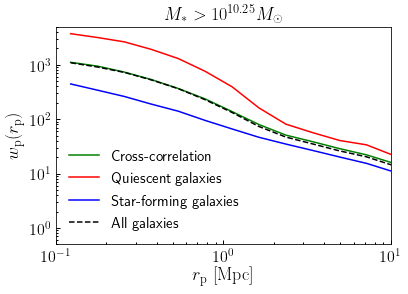

In [13]:
plt.plot(rp_bin_centers, wp_red_blue, 
         label=r'Cross-correlation', 
         color='green')
plt.plot(rp_bin_centers, wp_red_red, 
         label=r'Quiescent galaxies', 
         color='red')
plt.plot(rp_bin_centers, wp_blue_blue, 
         label=r'Star-forming galaxies', 
         color='blue')
plt.plot(rp_bin_centers, wp_all, '--',
         label=r'All galaxies', 
         color='k')

__=plt.xlim(0.1,10)
__=plt.ylim(0.5, 5e3)
__=plt.loglog()
__=plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc]}$')
__=plt.ylabel(r'$w_{\rm p}(r_{\rm p})$')
__=plt.title(r'$M_{\ast} > 10^{10.25}M_{\odot}$')
__=plt.legend()